In [1]:

# Data manipulation

from src.utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
from pprint import pprint
import datetime


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#from catboost import CatBoostRegressor
# Options for pandas
pd.options.display.max_columns = 50

pd.options.display.max_rows = 100

%matplotlib inline

In [25]:
pip install install pyarrow==1.0.1

  Using cached pyarrow-1.0.1-cp37-cp37m-macosx_10_9_intel.whl (11.0 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 12.0.1
    Uninstalling pyarrow-12.0.1:
      Successfully uninstalled pyarrow-12.0.1
You should consider upgrading via the '/Users/user/Airbnb data analysis/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StructType, StructField, StringType
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a Spark session
spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

23/10/26 18:50:39 WARN Utils: Your hostname, users-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 172.20.10.2 instead (on interface en0)
23/10/26 18:50:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/26 18:50:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/Users/user/Airbnb data analysis/venv/lib/python3.7/site-packages/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


In [19]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StructType, StructField, StringType
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pyspark.sql.functions import col



from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

#df_seed["Polarized"] = df_seed["comments"].apply(lambda  x: sentiment.polarity_scores(str(x)))


# Create a Spark session
spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()





def analyze_sentiment(text):
    # sentiment_scores = [sia.polarity_scores(t) for t in text]
    # sentiments = []
    # for score in sentiment_scores:
    #     if score['compound'] >= 0.05:
    #         sentiments.append(1)
    #     elif score['compound'] <= -0.05:
    #         sentiments.append(0)
    #     else:
    #         sentiments.append(-1)
    return  sentiment.polarity_scores(text)


analyze_sentiment = spark.udf.register("analyze_sentiment", analyze_sentiment)

def perform_sentiment_analysis(input_df, input_column):
    """
    Perform sentiment analysis on a specific column of a Pandas DataFrame using Spark.

    Args:
        input_df (pd.DataFrame): The input Pandas DataFrame.
        input_column (str): The name of the column to analyze.

    Returns:
        pd.DataFrame: A Pandas DataFrame with sentiment analysis results.
    """
    # Convert the input Pandas DataFrame to a Spark DataFrame
    spark_df = spark.createDataFrame(input_df)

    print(spark_df.show())

    # Apply sentiment analysis using the UDF
    result_df = spark_df.select(analyze_sentiment(col(input_column)))

    print(result_df.show())

    print("__________")

    #result_df = spark_df.withColumn("sentiment", analyze_sentiment(spark_df[input_column]))


    # Convert the result Spark DataFrame back to Pandas
    result_pandas_df = result_df.toPandas()

    return result_pandas_df

# Sample data as a Pandas DataFrame
# data = {"text": ["I love this product! It's amazing.",
#                  "This is terrible.",
#                  "Neutral statement."]}
# pandas_df = pd.DataFrame(data)

# print(pandas_df)

# Perform sentiment analysis on the "text" column
result_pandas_df = perform_sentiment_analysis(df_revie, "comments")


# Show the result as a Pandas DataFrame
print(result_pandas_df)

# Stop the Spark session
spark.stop()

23/10/26 19:30:32 WARN SimpleFunctionRegistry: The function analyze_sentiment replaced a previously registered function.


+----------+------+----------+-----------+-------------+--------------------+
|listing_id|    id|      date|reviewer_id|reviewer_name|            comments|
+----------+------+----------+-----------+-------------+--------------------+
|     13913| 80770|2010-08-18|     177109|      Michael|My girlfriend and...|
|     13913|367568|2011-07-11|   19835707|      Mathias|Alina was a reall...|
|     13913|529579|2011-09-13|    1110304|      Kristin|Alina is an amazi...|
|     13913|595481|2011-10-03|    1216358|      Camilla|Alina's place is ...|
|     13913|612947|2011-10-09|     490840|        Jorik|Nice location in ...|
+----------+------+----------+-----------+-------------+--------------------+

None
+---------------------------+
|analyze_sentiment(comments)|
+---------------------------+
|       {neg=0.028, pos=0...|
|       {neg=0.0, pos=0.2...|
|       {neg=0.0, pos=0.2...|
|       {neg=0.0, pos=0.2...|
|       {neg=0.0, pos=0.3...|
+---------------------------+

None
__________
     

In [20]:
result_pandas_df

,analyze_sentiment(comments)
0,"{neg=0.028, pos=0.187, compound=0.9827, neu=0...."
1,"{neg=0.0, pos=0.224, compound=0.8122, neu=0.776}"
2,"{neg=0.0, pos=0.286, compound=0.9722, neu=0.714}"
3,"{neg=0.0, pos=0.251, compound=0.9781, neu=0.749}"
4,"{neg=0.0, pos=0.396, compound=0.8479, neu=0.604}"


In [3]:
df_revie = df_reviews_2.head()

In [ ]:
result_pandas_df

In [10]:
import pyarrow

In [20]:
df_listings_1 = pd.read_csv("/Users/user/Downloads/listings.csv")
df_listings_2 = pd.read_csv("/Users/user/Downloads/listings (1).csv")

/Users/user/Airbnb data analysis/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df_reviews_1 = pd.read_csv("/Users/user/Downloads/reviews.csv")
df_reviews_2 = pd.read_csv("/Users/user/Downloads/reviews 2.csv")

In [59]:
df_listings_1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df_listings_1.columns

In [63]:
#new_df_2 = df_listings_1.merge(df_reviews_2, on=['host_id','reviewer_id'])

In [64]:
new_df = pd.merge(df_listings_1, df_reviews_2,  how='inner', left_on=['host_id'], right_on = ['reviewer_id'])

In [65]:
new_df.shape

(11467, 81)

In [66]:
new_df.tail()

,id_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
11462,971710639269953370,https://www.airbnb.com/rooms/971710639269953370,20230906022807,2023-09-06,city scrape,Rental unit in Greater London · ★New · 1 bedro...,Ideal for 2 friends who travel together and do...,NaN,https://a0.muscache.com/pictures/6ace7415-0342...,183376367,https://www.airbnb.com/users/show/183376367,Sotiria,2018-04-09,"London, United Kingdom",NaN,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/81e7c...,https://a0.muscache.com/im/pictures/user/81e7c...,NaN,2.0,2.0,"['email', 'phone']",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN,39363294,728094709678522394,2022-10-01,183376367,Sotiria,The room was beautiful with great view of the ...
11463,972997704224764341,https://www.airbnb.com/rooms/972997704224764341,20230906022807,2023-09-06,city scrape,Rental unit in Greater London · ★New · 2 bedro...,One bedroom with Super King size bed (firm mat...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,183376367,https://www.airbnb.com/users/show/183376367,Sotiria,2018-04-09,"London, United Kingdom",NaN,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/81e7c...,https://a0.muscache.com/im/pictures/user/81e7c...,NaN,2.0,2.0,"['email', 'phone']",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN,39363294,728094709678522394,2022-10-01,183376367,Sotiria,The room was beautiful with great view of the ...
11464,972266847925612095,https://www.airbnb.com/rooms/972266847925612095,20230906022807,2023-09-07,city scrape,Rental unit in Greater London · ★New · 2 bedro...,Peaceful and quiet but still rather central. R...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,13761289,https://www.airbnb.com/users/show/13761289,Arty,2014-04-01,"London, United Kingdom",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/e8844...,https://a0.muscache.com/im/pictures/user/e8844...,NaN,1.0,4.0,"['email', 'phone']",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN,24360836,283259611,2018-06-29,13761289,Arty,Great flat with nice views over East London. <...
11465,972921363271815064,https://www.airbnb.com/rooms/972921363271815064,20230906022807,2023-09-06,city scrape,Rental unit in Greater London · ★New · 2 bedro...,Welcome to our modern and spacious 2 bedroom a...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,20382663,https://www.airbnb.com/users/show/20382663,Hongli,2014-08-22,"Munich, Germany",NaN,within an hour,100%,67%,f,https://a0.muscache.com/im/pictures/user/b413b...,https://a0.muscache.com/im/pictures/user/b413b...,NaN,5.0,8.0,"['email', 'phone']",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN,690498990365634396,752738610796224979,2022-11-04,20382663,Hongli,perfect location! we had all we needed
11466,973048941029391734,https://www.airbnb.com/rooms/973048941029391734,20230906022807,2023-09-06,city scrape,Rental unit in Greater London · ★New · 1 bedro...,We offer a bright clean spacious room in a cal...,Location<br />-Quiet and safe neighbourhood.<b...,https://a0.muscache.com/pictures/hosting/Hosti...,255953712,https://www.airbnb.com/users/show/255953712,Jo,2019-04-15,"Lo

In [28]:
df_listings_1.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,https://www.airbnb.com/users/show/498201,Dee Dee,2011-04-10,"London, United Kingdom",I am employed at St Georges hospital in tootin...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/0edcb...,https://a0.muscache.com/im/pictures/user/0edcb...,Earlsfield,1.0,1.0,"['email', 'phone']",...,t,0,0,0,217,2023-09-06,216,9,0,2011-06-21,2022-10-29,4.57,4.74,4.86,4.71,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,https://www.airbnb.com/users/show/499704,Sarah,2011-04-11,"London, United Kingdom",Been living in London for over 20 years and I ...,within a few hours,100%,25%,f,https://a0.muscache.com/im/pictures/user/452ff...,https://a0.muscache.com/im/pictures/user/452ff...,Hammersmith,1.0,2.0,"['email', 'phone']",...,t,13,18,38,40,2023-09-06,38,2,0,2012-02-01,2022-09-30,4.82,4.76,4.62,4.85,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,88%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,4.0,"['email', 'phone']",...,t,25,55,85,360,2023-09-06,41,11,0,2010-08-18,2022-12-11,4.80,4.72,4.72,4.74,4.82,4.69,4.69,NaN,f,2,1,1,0,0.26
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Royal Borough of Kensington and Chelsea, Unite...","English, grandmother, I have travelled quite ...",within a day,100%,41%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,12.0,"['email', 'phone']",...,t,7,7,7,73,2023-09-06,94,5,0,2009-12-21,2023-05-01,4.80,4.85,4.88,4.88,4.83,4.93,4.74,NaN,f,1,1,0,0,0.56
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,https://www.airbnb.com/users/show/497514,William,2011-04-10,"London, United Kingdom",I’m a mave

In [29]:
df_listings_2.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,https://www.airbnb.com/users/show/498201,Dee Dee,2011-04-10,"London, United Kingdom",I am employed at St Georges hospital in tootin...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/0edcb...,https://a0.muscache.com/im/pictures/user/0edcb...,Earlsfield,1.0,1.0,"['email', 'phone']",...,t,0,0,0,217,2023-09-06,216,9,0,2011-06-21,2022-10-29,4.57,4.74,4.86,4.71,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,https://www.airbnb.com/users/show/499704,Sarah,2011-04-11,"London, United Kingdom",Been living in London for over 20 years and I ...,within a few hours,100%,25%,f,https://a0.muscache.com/im/pictures/user/452ff...,https://a0.muscache.com/im/pictures/user/452ff...,Hammersmith,1.0,2.0,"['email', 'phone']",...,t,13,18,38,40,2023-09-06,38,2,0,2012-02-01,2022-09-30,4.82,4.76,4.62,4.85,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,88%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,4.0,"['email', 'phone']",...,t,25,55,85,360,2023-09-06,41,11,0,2010-08-18,2022-12-11,4.80,4.72,4.72,4.74,4.82,4.69,4.69,NaN,f,2,1,1,0,0.26
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Royal Borough of Kensington and Chelsea, Unite...","English, grandmother, I have travelled quite ...",within a day,100%,41%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,12.0,"['email', 'phone']",...,t,7,7,7,73,2023-09-06,94,5,0,2009-12-21,2023-05-01,4.80,4.85,4.88,4.88,4.83,4.93,4.74,NaN,f,1,1,0,0,0.56
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,https://www.airbnb.com/users/show/497514,William,2011-04-10,"London, United Kingdom",I’m a mave

In [26]:
print(f'There are {df_reviews_1.shape[0]} number of listings in London as of {df_listings.last_scraped.max()}')

There are 1581033 number of listings in London as of 2023-09-07


In [27]:
print(f'There are {df_reviews_2.shape[0]} number of listings in London as of {df_listings.last_scraped.max()}')

There are 1581033 number of listings in London as of 2023-09-07


In [30]:
df_reviews_1.head()

,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13
3,13913,2011-10-03
4,13913,2011-10-09


In [41]:
df_seed = df_reviews_2.tail().copy()

In [46]:
df_reviews_2.merge()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [34]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

df_seed["Polarized"] = df_seed["comments"].apply(lambda  x: sentiment.polarity_scores(str(x)))


In [42]:
df_seed["Polarized"] = df_seed["comments"].apply(lambda  x: sentiment.polarity_scores(str(x)))

In [43]:
df_seed.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Polarized
1581028,971887875299343051,973108321598840305,2023-09-04,532269963,Lamyae,We had a great stay at khalid place It was exa...,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp..."
1581029,970295459665929952,973125058284346062,2023-09-04,814456,Jose,"Nice place in a very nice location, very quite...","{'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'comp..."
1581030,970371341816641811,972368731470763706,2023-09-03,208891911,Anjuman,Elza est une hôte très réactive et amicale. L’...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1581031,970371341816641811,973812238966134743,2023-09-05,458483914,Recep,"The place was clean and felt cosy, had a lot o...","{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp..."
1581032,970392619756691204,973786231321668276,2023-09-05,268096828,Melike,Ev sahibi çok ilgili ve yardımseverdi pek çok ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [16]:
df_listings.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,https://www.airbnb.com/users/show/498201,Dee Dee,2011-04-10,"London, United Kingdom",I am employed at St Georges hospital in tootin...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/0edcb...,https://a0.muscache.com/im/pictures/user/0edcb...,Earlsfield,1.0,1.0,"['email', 'phone']",...,t,0,0,0,217,2023-09-06,216,9,0,2011-06-21,2022-10-29,4.57,4.74,4.86,4.71,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,https://www.airbnb.com/users/show/499704,Sarah,2011-04-11,"London, United Kingdom",Been living in London for over 20 years and I ...,within a few hours,100%,25%,f,https://a0.muscache.com/im/pictures/user/452ff...,https://a0.muscache.com/im/pictures/user/452ff...,Hammersmith,1.0,2.0,"['email', 'phone']",...,t,13,18,38,40,2023-09-06,38,2,0,2012-02-01,2022-09-30,4.82,4.76,4.62,4.85,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,88%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,4.0,"['email', 'phone']",...,t,25,55,85,360,2023-09-06,41,11,0,2010-08-18,2022-12-11,4.80,4.72,4.72,4.74,4.82,4.69,4.69,NaN,f,2,1,1,0,0.26
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Royal Borough of Kensington and Chelsea, Unite...","English, grandmother, I have travelled quite ...",within a day,100%,41%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,12.0,"['email', 'phone']",...,t,7,7,7,73,2023-09-06,94,5,0,2009-12-21,2023-05-01,4.80,4.85,4.88,4.88,4.83,4.93,4.74,NaN,f,1,1,0,0,0.56
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,https://www.airbnb.com/users/show/497514,William,2011-04-10,"London, United Kingdom",I’m a mave

In [4]:
df_listings.isna().mean().sort_values(ascending=False)[:20]

neighbourhood_group_cleansed    1.000000
bathrooms                       1.000000
calendar_updated                1.000000
license                         0.999989
host_about                      0.478021
neighborhood_overview           0.463421
neighbourhood                   0.463409
host_neighbourhood              0.453312
bedrooms                        0.372660
host_response_time              0.328815
host_response_rate              0.328815
host_acceptance_rate            0.286403
review_scores_value             0.262957
review_scores_checkin           0.262945
review_scores_location          0.262945
review_scores_communication     0.262604
review_scores_accuracy          0.262582
review_scores_cleanliness       0.262445
last_review                     0.251950
first_review                    0.251950
dtype: float64

In [5]:
df_listings = df_listings.drop(["neighbourhood_group_cleansed","calendar_updated","license","host_about"],axis=1)

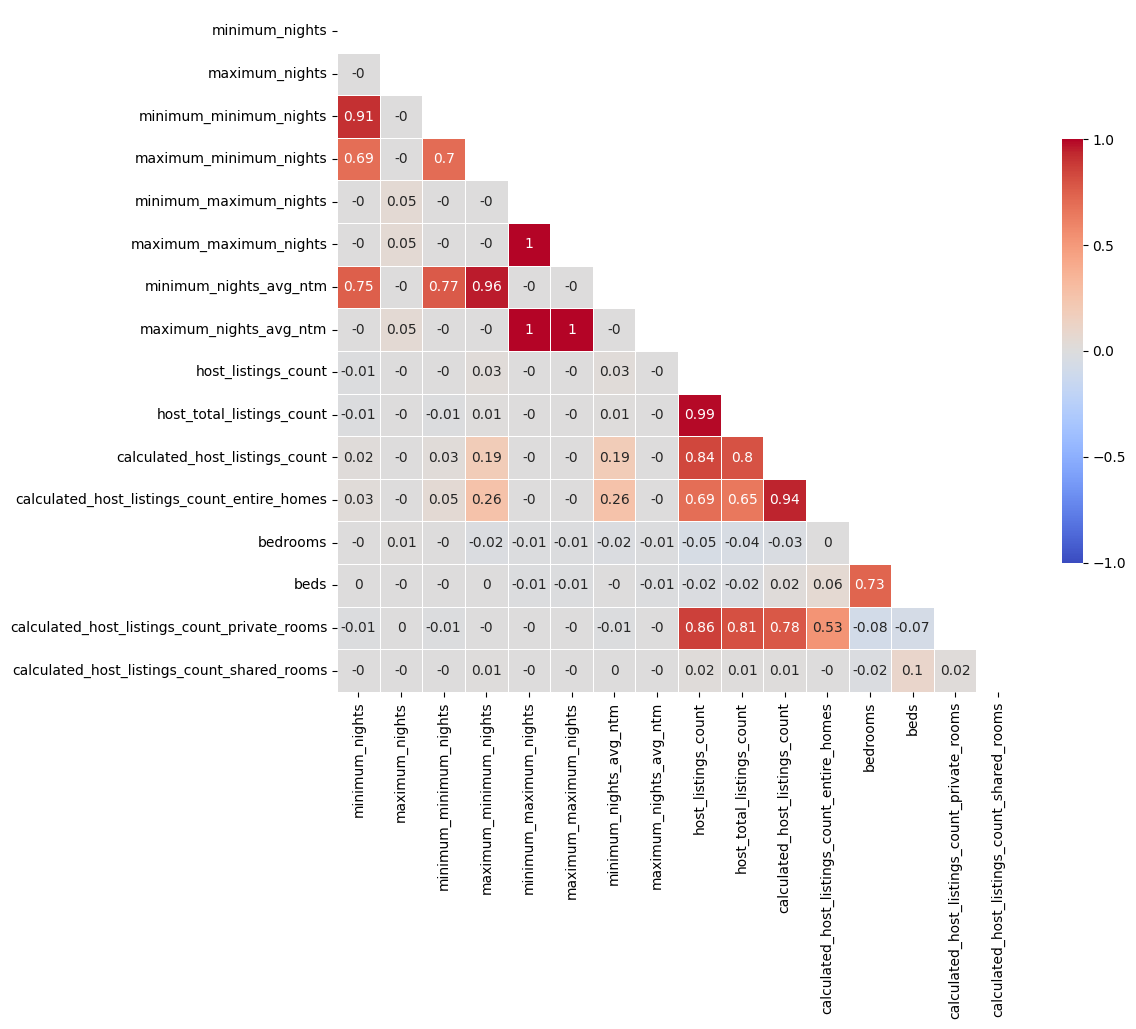

In [6]:
filtered_col = ['minimum_nights', 'maximum_nights',
              'minimum_minimum_nights', 'maximum_minimum_nights',
              'minimum_maximum_nights', 'maximum_maximum_nights',
              'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
              'host_listings_count', 'host_total_listings_count',
              'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
              'bedrooms', 'beds',  'calculated_host_listings_count_private_rooms',
              'calculated_host_listings_count_shared_rooms',
              ]
annotated_heatmap(df_listings, filtered_col)

In [8]:
df_listings['has_availability'].value_counts()

t    83477
f     4469
Name: has_availability, dtype: int64

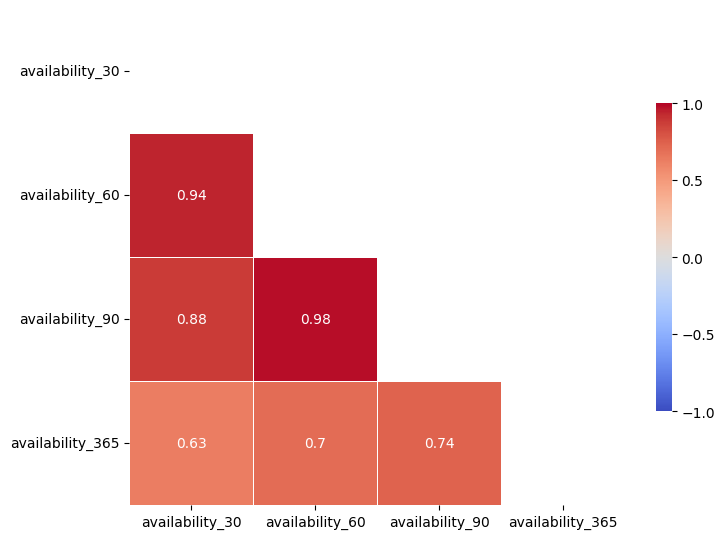

In [9]:
availability_col = ['availability_30', 'availability_60', 'availability_90', 'availability_365' ]
annotated_heatmap(df_listings, availability_col, figsize=(8, 8))

In [10]:
df_listings = df_listings.drop(['has_availability', 'availability_30', 'availability_60', 'availability_365'], axis=1)

In [13]:
#c_palette = ['tab:blue', 'tab:orange']
#plot_categorical(df_listings, x='experiences_offered', filename='experience_count', palette=c_palette, figsize=(8,4))

In [7]:
df_listings = df_listings.drop(['jurisdiction_names', 'neighbourhood_group_cleansed', 'xl_picture_url', 'host_acceptance_rate',
                               'medium_url', 'thumbnail_url', 'license', 'square_feet', 'monthly_price', 'weekly_price',
                               'listing_url', 'scrape_id', 'last_scraped', 'calendar_updated', 'house_rules'], axis=1)

KeyError: "['jurisdiction_names' 'neighbourhood_group_cleansed' 'xl_picture_url'\n 'medium_url' 'thumbnail_url' 'license' 'square_feet' 'monthly_price'\n 'weekly_price' 'calendar_updated' 'house_rules'] not found in axis"